#Projeto de Estatística
- Épreciso instalalar o pandas, matplotlib e seaborn
- use: _pip install pandas matplotlib seaborn_

In [16]:
#importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- importando e entendendo base de dados

In [17]:
df = pd.read_csv(r"C:\Users\admin\Documents\GitHub\aprendendo-Python\Alanise\student_habits_performance.csv")

In [3]:
#visualizando os dados
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


- Quais os hábitos mais impactam o  desempenho dos aluonos?

In [18]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

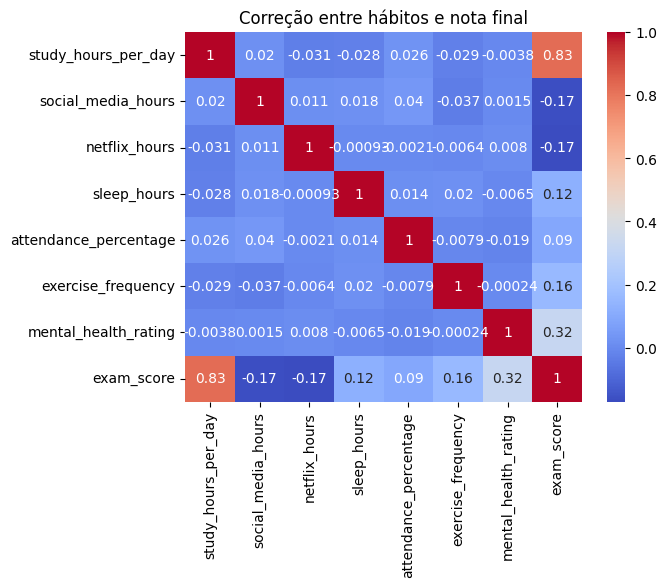

In [19]:
#Colunas numeéricas
cols = [
    "study_hours_per_day", 
    "social_media_hours", 
    "netflix_hours",
    "sleep_hours", 
    "attendance_percentage", 
    "exercise_frequency", 
    "mental_health_rating", 
    "exam_score",
]
#Plotr mapa de calor (heatmap)

sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correção entre hábitos e nota final")
plt.show()

- Alunos que estudam mais têm um melhor desempenho?


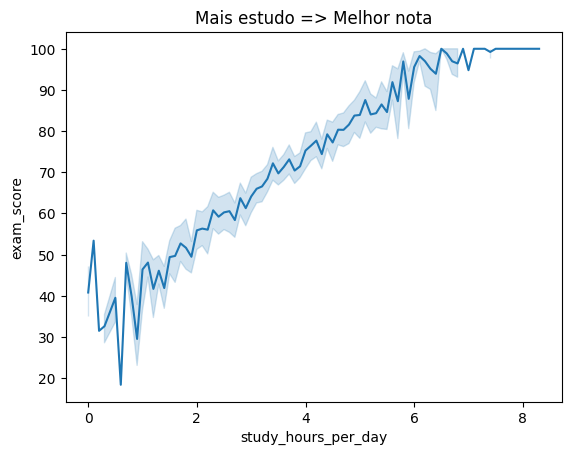

In [20]:
# Gráfico de dispersão com linha de regressão
# x = "study_hours_per_day" / y = "exam_score"
sns.lineplot(data=df, x = "study_hours_per_day", y ="exam_score")
plt.title("Mais estudo => Melhor nota")
plt.show()

In [21]:
#Comparando médias: quem estuda >5h x <2h por dia
filtro_estudo_alto = df["study_hours_per_day"] > 5
filtro_estudo_baixo = df["study_hours_per_day"] < 2

grupo_estudo_alto = df[filtro_estudo_alto]["exam_score"].mean()
grupo_estudo_baixo = df[filtro_estudo_baixo]["exam_score"].mean()

print("media notas (estuda > 5h):", grupo_estudo_alto.mean())
print("media notas (estuda < 2h):", grupo_estudo_baixo.mean())

media notas (estuda > 5h): 90.79419354838709
media notas (estuda < 2h): 45.56390977443609


- O tempo gasto nas redes sociais afeta ou não o desempenho do aluno?

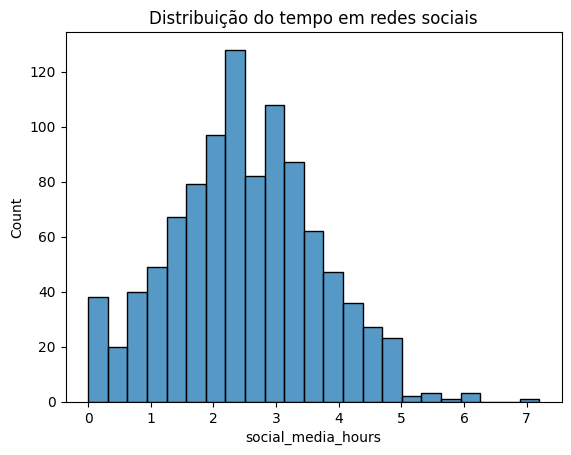

In [22]:
# Redes sociais: Distribuição geral (histograma)
# x = social_media_hours

sns.histplot(data = df, x = "social_media_hours")
plt.title("Distribuição do tempo em redes sociais")
plt.show()

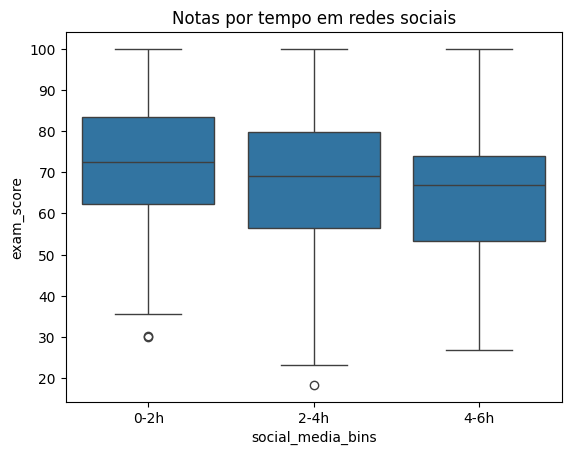

In [26]:
# Avaliar notas médias por diferentes intervalos (bins)de periodos gastos em redes sociais
# [0- 2h, 2-4h, 4-6h, 6h+]
df["social_media_bins"] = pd.cut(
    df["social_media_hours"], 
    bins=[0, 2, 4, 6],
    labels=["0-2h", "2-4h", "4-6h"]
)

# plotar grafico de caixa (boxplot)
sns.boxplot(x = "social_media_bins", y = "exam_score", data = df  )
plt.title("Notas por tempo em redes sociais")
plt.show()


- Desempenho dos alunos mais saudaveis.

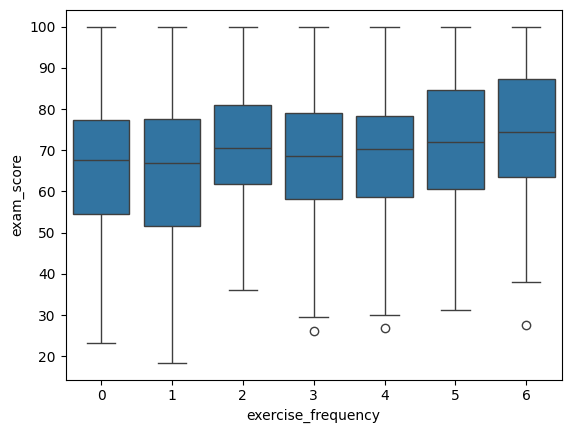

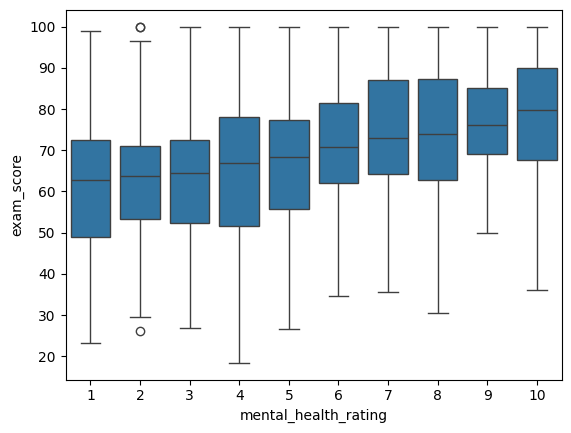

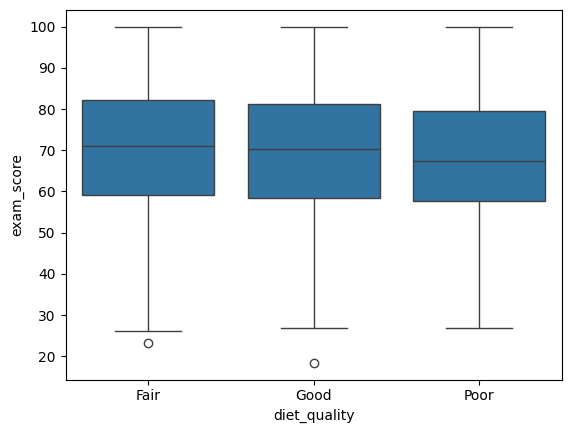

In [28]:
# Frequencia de exercícios físicos
for col in ["exercise_frequency", "mental_health_rating", "diet_quality"]:
	sns.boxplot(x=col, y="exam_score", data=df)
	plt.show()

- Diferença entre mulheres e homens.

In [30]:
#Estatísticas por gênero (media e desvio padrão)
df.groupby(["gender"])["exam_score"].agg(["mean", "std"])

,mean,std
gender,,
Female,69.741372,16.899351
Male,69.368344,17.150875
Other,70.647619,13.755890


In [31]:
# Distribuição de gênero
df["gender"].value_counts(normalize =True)

gender
Female    0.481
Male      0.477
Other     0.042
Name: proportion, dtype: float64